___
# MINIPROJETO 1

## <font color='red'>Guilherme de Moraes Schoueri</font>
___

## <font color='blue'>Pontos Marcados por Jogo pelo jogador da NBA: Carmelo Anthony </font>

___
### Itens 1 a 3 - Resolução:

##### Leitura do Dataset

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

carm = pd.read_table('carmelo2010-16.txt', sep=",")

Esperamos trabalhar no diretório
C:\Users\Guilherme Moraes\Desktop\CDEng-master\aula02\miniProjeto1


___


##### Limpeza dos dados

In [3]:
for i in range(len(carm.PTS)):
    if carm.PTS[i] == "Did Not Play" or carm.PTS[i] == "Inactive" or carm.PTS[i] == "Player Suspended":
        carm.PTS[i] = 999

for i in range (len(carm.PTS)):
    carm.PTS[i] = float(carm.PTS[i])


C:\Users\Guilherme Moraes\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Guilherme Moraes\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
pontos = carm.PTS[(carm.PTS != 999)]

pontos = pontos.dropna()

##### Histograma dos dados reais já filtrados

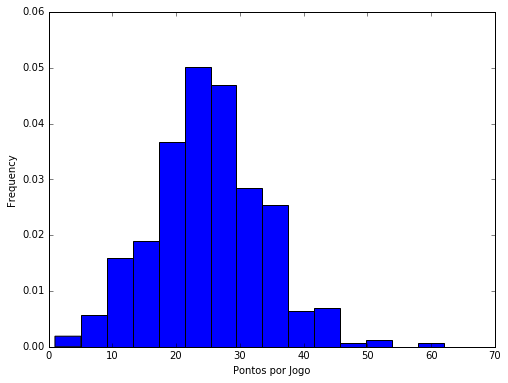

In [5]:
pontos.plot.hist(bins=15, normed=True, figsize=(8, 6))
plt.xlabel("Pontos por Jogo")

##### Cálculo da média e do desvio padrão dos dados

In [8]:
ls = list(pontos)

soma = 0

for i in ls:
    soma += float(i)

media = soma/len(ls)

media

25.221649484536083

In [9]:
soma = 0

for i in ls:
    soma += (i - media)**2

desvio = (soma/len(ls))**(1/2)

desvio

8.619227209650088

___
### Itens 4 a 6 - Resolução:

##### Cálculo das funções pdf para os estilos Normal, Gamma e Chi

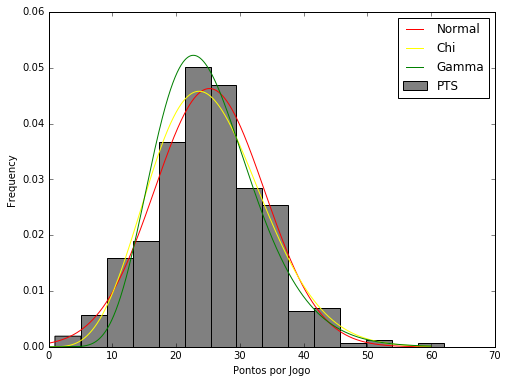

In [11]:
x = np.arange(0, 60, 0.01)

pontos.plot.hist(bins=15, normed=True, figsize=(8, 6), color="grey")
plt.plot(x, stats.norm.pdf(x, loc=media, scale=desvio), '-', color="red", label='Normal')
plt.xlabel("Pontos por Jogo")


# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_chi = 2
k_gamma = 10

# Estimamos theta da distribuição gamma
theta_chi = media/k_chi
theta_gamma = media/k_gamma

c = stats.chi.pdf(x, 4.5, loc=0, scale=theta_chi)
gama = stats.gamma.pdf(x, 10, loc=0, scale=theta_gamma)

plt.plot(x, c, '-', color='yellow', label="Chi")
plt.plot(x, gama, '-', color='green', label="Gamma")

plt.legend()

##### Cálculo do .fit para cada uma das funções

In [12]:
nor = stats.norm.fit(pontos)
g = stats.gamma.fit(pontos.astype(float))
chi = stats.chi.fit(pontos.astype(float), 4.5, loc=0, scale=theta_chi)

##### Cálculo das funções pdf com os valores do .fit

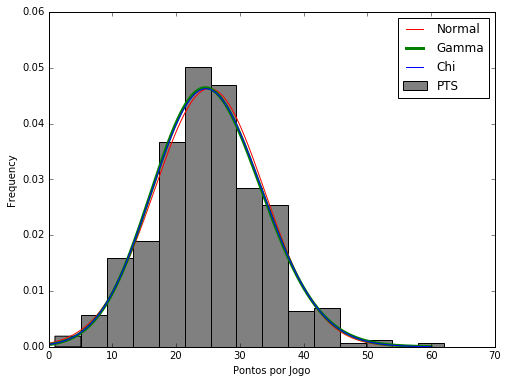

In [13]:
x = np.arange(0, 60, 0.01)

pontos.plot.hist(bins=15, normed=True, figsize=(8, 6), color="grey")
plt.plot(x, stats.norm.pdf(x, loc=nor[0], scale=nor[1]), '-', color="red", label='Normal')
plt.xlabel("Pontos por Jogo")

gammafit = stats.gamma.pdf(x, g[0], loc=g[1], scale=g[2])
chifit = stats.chi.pdf(x, chi[0], loc=chi[1], scale=chi[2])

plt.plot(x, gammafit, '-', color='green', label="Gamma", linewidth=3)
plt.plot(x, chifit, '-', color='blue', label="Chi")

plt.legend()

___
### Itens 7 a 9 - Resolução:

##### Q-Q plot das funções com os valores do .fit

[1.0, 62.0, 1.0, 62.0]

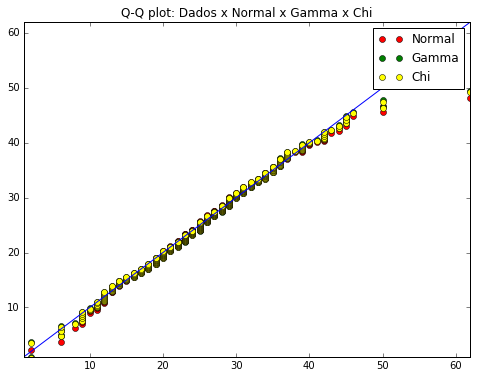

In [161]:
fra = [] # frequencia relativa acumulada
for i in range(len(pontos)):
    acc = (i - 0.5) / len(pontos)
    if acc < 0:
        acc = 0
    fra.append(acc)
    
fra = pd.Series(data=fra)

q_norm = stats.norm.ppf(fra, loc=nor[0], scale=nor[1])
q_gamma = stats.gamma.ppf(fra, a=g[0], loc=g[1], scale=g[2])
q_chi = stats.chi.ppf(fra, chi[0], loc=chi[1], scale=chi[2])

plt.figure(figsize=(8, 6))

plt.title("Q-Q plot: Dados x Normal x Gamma x Chi")

norm_plot = plt.plot(sorted(pontos), q_norm, 'o', color="red", label="Normal")
gamma_plot = plt.plot(sorted(pontos), q_gamma, 'o', color="green", label = "Gamma")
chi_plot = plt.plot(sorted(pontos), q_chi, 'o', color="yellow", label = "Chi")

plt.legend()
plt.plot((min(pontos), max(pontos)), (min(pontos), max(pontos)), '-')
plt.axis([min(pontos), max(pontos), min(pontos), max(pontos)])

##### Cumulativa das funções com os valores do .fit

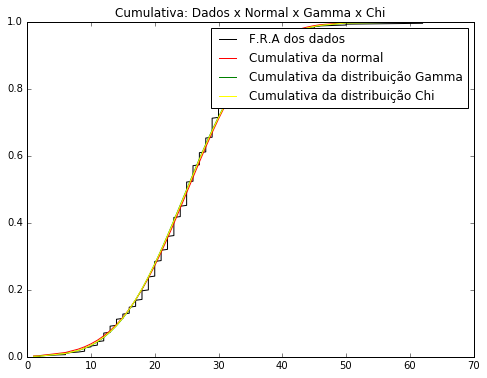

In [164]:
cdf_norm = stats.norm.cdf(sorted(pontos), loc=nor[0], scale=nor[1])
cdf_gamma = stats.gamma.cdf(sorted(pontos), a=g[0], loc=g[1], scale=g[2])
cdf_chi = stats.chi.cdf(sorted(pontos), chi[0], loc=chi[1], scale=chi[2])

plt.figure(figsize=(8,6))

plt.title("Cumulativa: Dados x Normal x Gamma x Chi")

dados_fra_plot = plt.plot(sorted(pontos), fra, '-', color='black', label="F.R.A dos dados")
cdf_norm_plot = plt.plot(sorted(pontos), cdf_norm, '-', color='red', label = "Cumulativa da normal")
cdf_gamma_plot = plt.plot(sorted(pontos), cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")
cdf_chi_plot = plt.plot(sorted(pontos), cdf_chi, '-', color='yellow', label = "Cumulativa da distribuição Chi")

plt.legend()
plt.show()
#for i in range(len(pontos)):
#    plt.plot((pontos[i], pontos[i]), (fra[i], cdf_norm[i]), ':', color="red", alpha=0.3)
#    #Omitido para não poluir muito o gráfico
#    plt.plot((pontos[i], pontos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)

___
### Itens 10 e 11 - Resolução:

##### Cálculo dos Erros quadráticos

In [165]:
# Erro quadrático nas CDFs
erro_quad_cdf_norm = sum((fra - cdf_norm)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

erro_quad_cdf_chi = sum((fra - cdf_chi)**2)

print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_norm)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)
print("Erro quadrático da CDF da Chi versus F.R.A", erro_quad_cdf_chi)

Erro quadrático da CDF da Normal versus F.R.A 0.0931522128021
Erro quadrático da CDF da Gamma versus F.R.A 0.1053725207
Erro quadrático da CDF da Chi versus F.R.A 0.102865213977


## Conclusão

Depois da análise de cada uma das distribuições, é possível perceber que elas são muito próximas dos dados reais. Mesmo assim, aquela que mais de adequa ao dataset escolhido é a Normal, por ter o menor erro quadrático das distribuições.